# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --output dataset --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3 

In [3]:
import os 
cwd= os.getcwd()
print (cwd)

E:\ML\potato-leaf-disease-classification\training


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.40808672 0.41985142 0.48651809]
  [0.4309318  0.4426965  0.5093632 ]
  [0.46721935 0.47898406 0.5456507 ]
  ...
  [0.62778556 0.6591581  0.7336679 ]
  [0.63562864 0.6670012  0.741511  ]
  [0.6434717  0.67484426 0.74935406]]

 [[0.44234696 0.45411167 0.5207783 ]
  [0.41881388 0.4305786  0.49724525]
  [0.45377326 0.46553797 0.5322046 ]
  ...
  [0.64513135 0.6765039  0.7510137 ]
  [0.6473235  0.67869604 0.75320584]
  [0.6486054  0.67997795 0.75448775]]

 [[0.44897363 0.46073833 0.527405  ]
  [0.41030455 0.42206925 0.48873594]
  [0.46344256 0.47520727 0.541874  ]
  ...
  [0.6574016  0.68877417 0.76328397]
  [0.6487266  0.6800991  0.7546089 ]
  [0.6407468  0.6721193  0.7466291 ]]

 ...

 [[0.5360196  0.55562747 0.63405883]
  [0.5209336  0.54054147 0.6189729 ]
  [0.5244236  0.54403144 0.6224628 ]
  ...
  [0.68650514 0.71787775 0.79238755]
  [0.6970208  0.7283934  0.8029032 ]
  [0.70235115 0.7337237  0.8082335 ]]

 [[0.4934142  0.51302207 0.59145343]
  [0.48832914 0.507937   0.5863684 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [28]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1. 0. 0. 2. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0.]


## Building the Model

In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [71]:
1506/32

47.0625

In [72]:
215/32

6.71875

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 142s 3s/step - loss: 0.9074 - accuracy: 0.4957 - val_loss: 0.8295 - val_accuracy: 0.5469
Epoch 2/20
47/47 [==============================] - 147s 3s/step - loss: 0.6895 - accuracy: 0.6390 - val_loss: 0.5373 - val_accuracy: 0.7760
Epoch 3/20
47/47 [==============================] - 136s 3s/step - loss: 0.3963 - accuracy: 0.8337 - val_loss: 0.2282 - val_accuracy: 0.9010
Epoch 4/20
47/47 [==============================] - 145s 3s/step - loss: 0.3335 - accuracy: 0.8677 - val_loss: 0.1795 - val_accuracy: 0.9167
Epoch 5/20
47/47 [==============================] - 166s 4s/step - loss: 0.1135 - accuracy: 0.9593 - val_loss: 0.0900 - val_accuracy: 0.9635
Epoch 6/20
47/47 [==============================] - 144s 3s/step - loss: 0.1191 - accuracy: 0.9586 - val_loss: 0.1828 - val_accuracy: 0.9062
Epoch 7/20
47/47 [==============================] - 150s 3s/step - loss: 0.2397 - accuracy: 0.9098 - val_loss: 0.1938 - val_accuracy: 0.9271
Epoch 8/20
47

In [12]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 12s 2s/step - loss: 0.0667 - accuracy: 0.9815


In [13]:
scores

[0.06673305481672287, 0.9814814925193787]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [14]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [15]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [17]:
type(history.history['loss'])

list

In [18]:
len(history.history['loss'])

20

In [19]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9073700904846191,
 0.689508855342865,
 0.396346777677536,
 0.3335399329662323,
 0.11347371339797974]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [34]:
val_acc

[0.546875,
 0.7760416865348816,
 0.9010416865348816,
 0.9166666865348816,
 0.9635416865348816,
 0.90625,
 0.9270833134651184,
 0.8958333134651184,
 0.8385416865348816,
 0.9166666865348816,
 0.9583333134651184,
 0.8697916865348816,
 0.9739583134651184,
 0.953125,
 0.9635416865348816,
 0.96875,
 0.9791666865348816,
 0.9791666865348816,
 0.9635416865348816,
 0.96875]

In [35]:
acc

[0.4956579804420471,
 0.6389627456665039,
 0.8336673378944397,
 0.8677354454994202,
 0.9592518210411072,
 0.9585838317871094,
 0.9098196625709534,
 0.959919810295105,
 0.9672678709030151,
 0.9525718092918396,
 0.9545758366584778,
 0.9251837134361267,
 0.9632598757743835,
 0.9799599051475525,
 0.9786239266395569,
 0.991356372833252,
 0.991983950138092,
 0.9886439442634583,
 0.991983950138092,
 0.989311933517456]

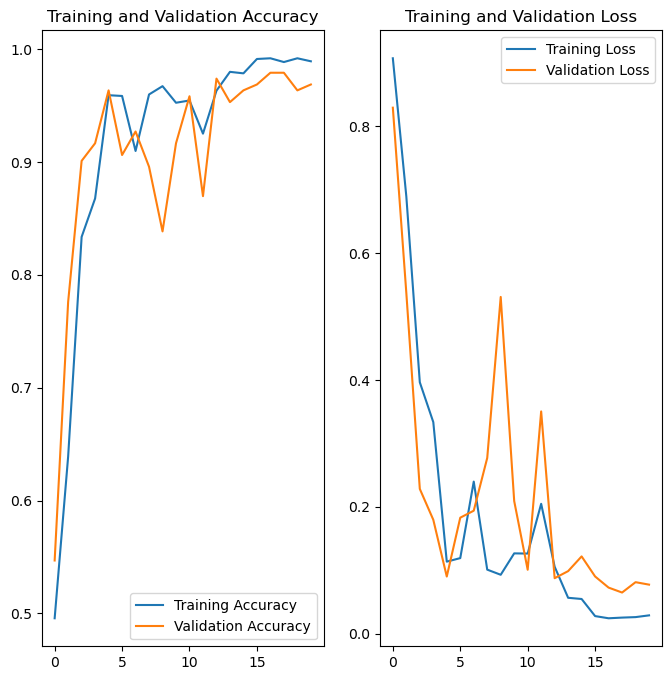

In [37]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

[0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 2. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1.]
actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Early_blight


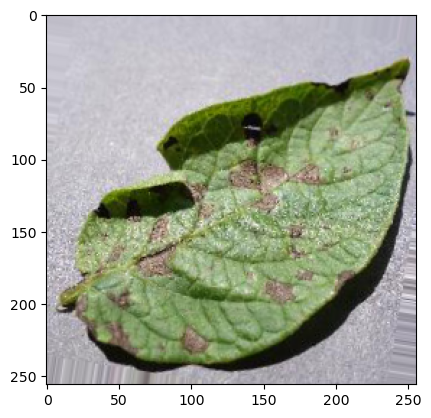

In [41]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print(label_batch)
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 70ms/step


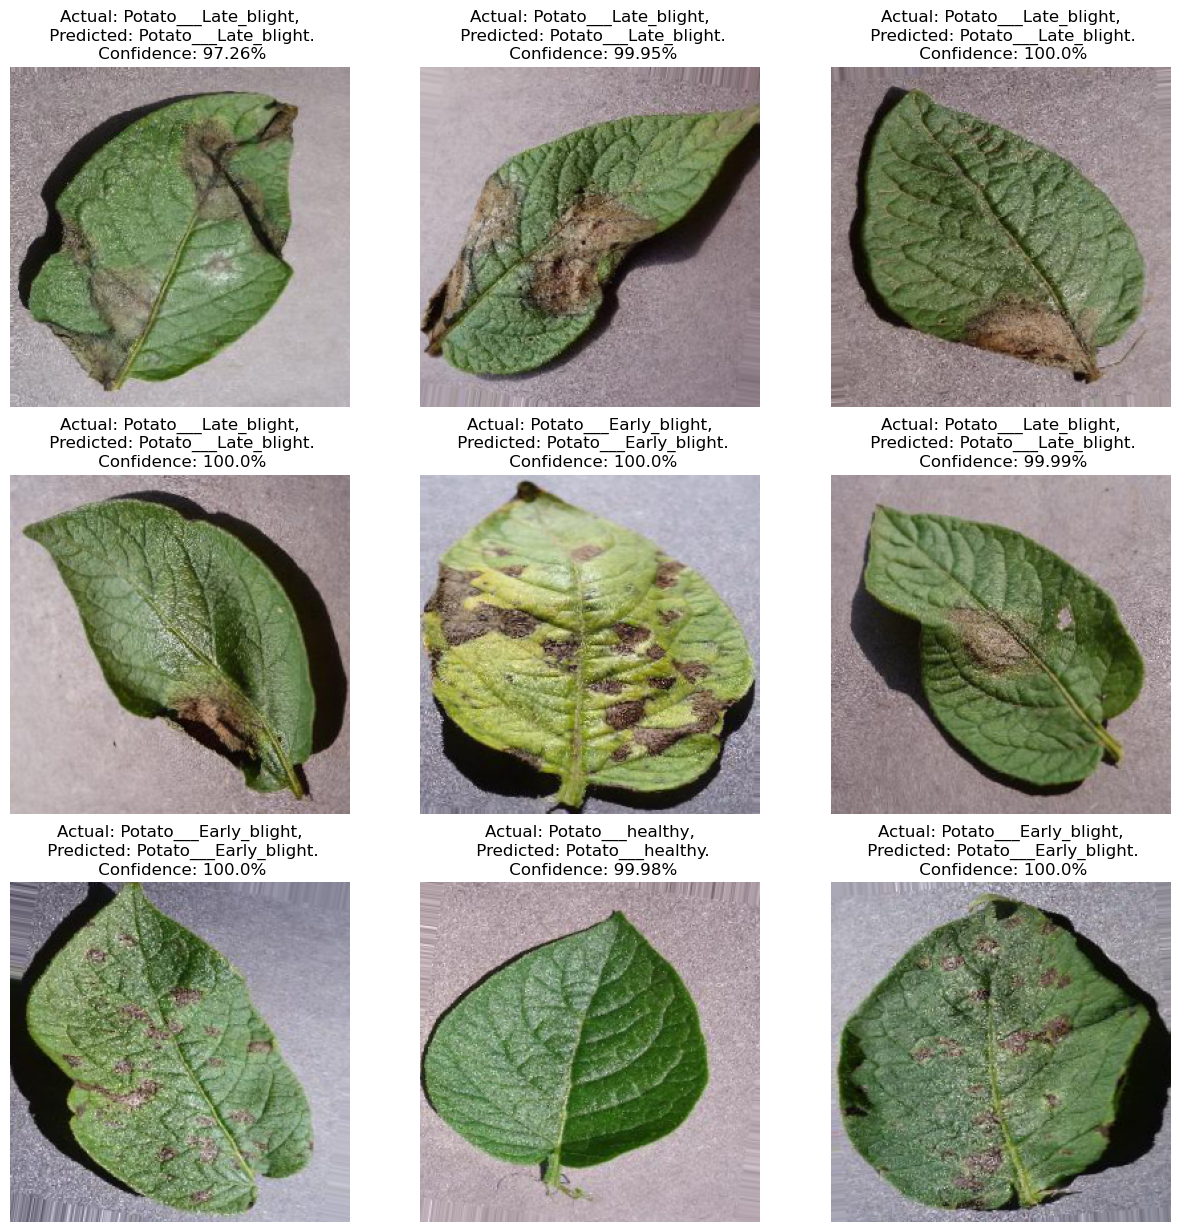

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [44]:
model.save("../potatoes.h5")